In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")
df_fb. sample(10)

daily_spend = df_fb.groupby('ad_date', as_index = False)[['total_spend', 'total_impressions', 'total_clicks','total_value']].sum()
plt.plot(daily_spend ['ad_date'], daily_spend['total_value'], color = 'blue', linestyle = 'solid')

daily_spend['romi']= daily_spend['total_value']/daily_spend['total_spend']
plt.plot(daily_spend ['ad_date'], daily_spend['romi'], color = 'red', linestyle = 'solid')
#plt.plot(daily_value ['date'], daily_value[['total']], marker = 'o')
#plt.xticks(df_fb['ad_date'].iloc[::30].index,rotation = 45)
#plt.legend(['fare', 'tip', 'tolls','total'], loc= 'upper right')
plt.xlabel('Date', fontsize='small', fontstyle= 'italic')
plt.ylabel('Value, usd', fontsize='small', fontstyle= 'italic')
#plt.title('xcrfditdc', loc='center')
#print(daily_spend)
#sns.lineplot(daily_spend, x='date', y='total_value', hue = 'passengers')
plt.show()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
397,2021-11-20,Brand,10.34,7485,19,7.82,0.54,1.38,0.002538,0.756286
316,2021-12-17,Trendy,93.93,18153,201,206.65,0.47,5.17,0.011073,2.200043
1464,2020-12-10,Discounts,25.52,8250,121,24.25,0.21,3.09,0.014667,0.950235
1325,2021-05-05,Promos,7.23,2792,37,9.06,0.20,2.59,0.013252,1.253112
1303,2021-05-14,Electronics,82.83,49061,241,62.94,0.34,1.69,0.004912,0.759870
1455,2020-12-20,Discounts,17.31,2370,277,17.12,0.06,7.30,0.116878,0.989024
1047,2021-07-06,Crazy discounts,15.70,20701,236,26.05,0.07,0.76,0.011400,1.659236
901,2021-08-01,Promos,39.08,10525,40,66.88,0.98,3.71,0.003800,1.711361
1138,2021-06-21,Lookalike,344.14,167457,1188,297.90,0.29,2.06,0.007094,0.865636
394,2021-11-21,Lookalike,220.45,128606,1579,223.20,0.14,1.71,0.012278,1.012474


1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:

Графік з щоденною сумою витрат на рекламу в 2021 році;
Графік з щоденним ROMI в 2021 році. 

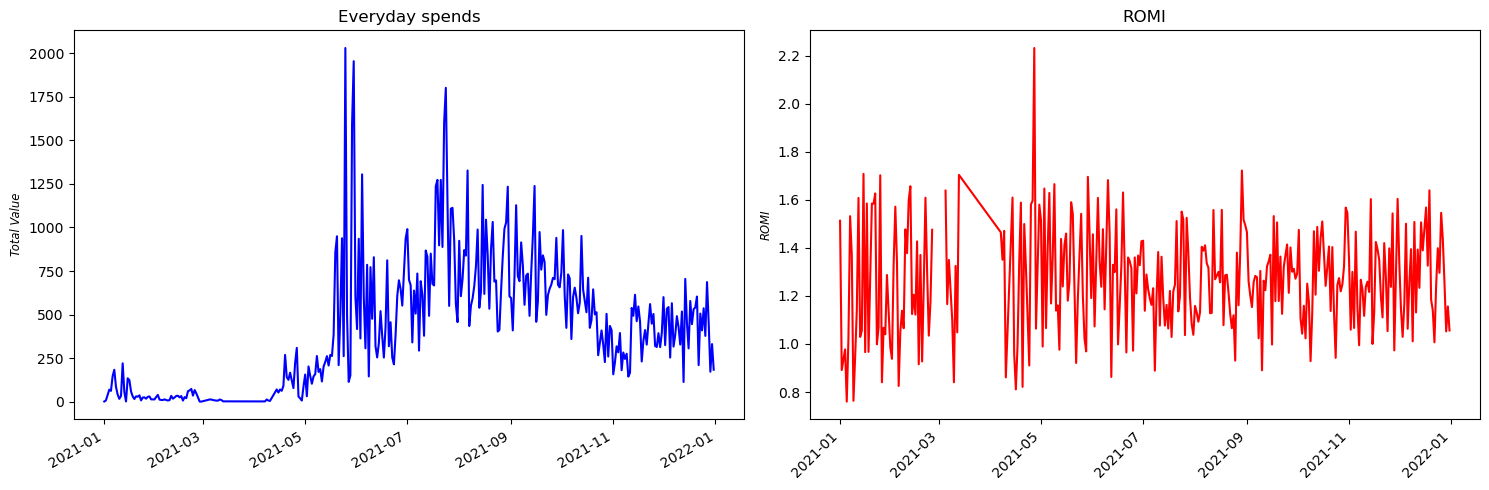

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")
# Group data by 'ad_date'
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'])
df_fb = df_fb[df_fb['ad_date'].dt.year == 2021]
#daily_spend = daily_spend.loc['2021-01-01':'2021-12-31']
daily_spend = df_fb.groupby('ad_date', as_index=False)[[ 'total_value','total_spend']].sum()
# 'total_impressions', 'total_clicks',
daily_spend['romi'] = daily_spend['total_value'] / daily_spend['total_spend']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Format 'ad_date' as datetime for both subplots
fig.autofmt_xdate()

# (ax1)
ax1.plot(daily_spend['ad_date'], daily_spend['total_value'], color='blue', linestyle='solid', label='Total Value')
plt.xticks(rotation=45)
ax1.set_ylabel('Total Value', fontsize='small', fontstyle='italic')
ax1.set_title('Everyday spends', loc='center')

#  (ax2)
ax2.plot(daily_spend['ad_date'], daily_spend['romi'], color='red', linestyle='solid', label='ROMI')
plt.xticks(rotation=45)
ax2.set_ylabel('ROMI', fontsize='small', fontstyle='italic')
ax2.set_title('ROMI', loc='center')
# Display the plot
plt.tight_layout()
plt.show()


2. Зроби групування даних за назвою кампанії побудуй два графіки:

Графік загальної суми витрат на рекламу в кожній з кампаній;
Загальний ROMI в кожній з кампаній.

C:\Users\tatia\AppData\Local\Temp\ipykernel_29816\679222507.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(grouped_df['campaign_name'].unique()))


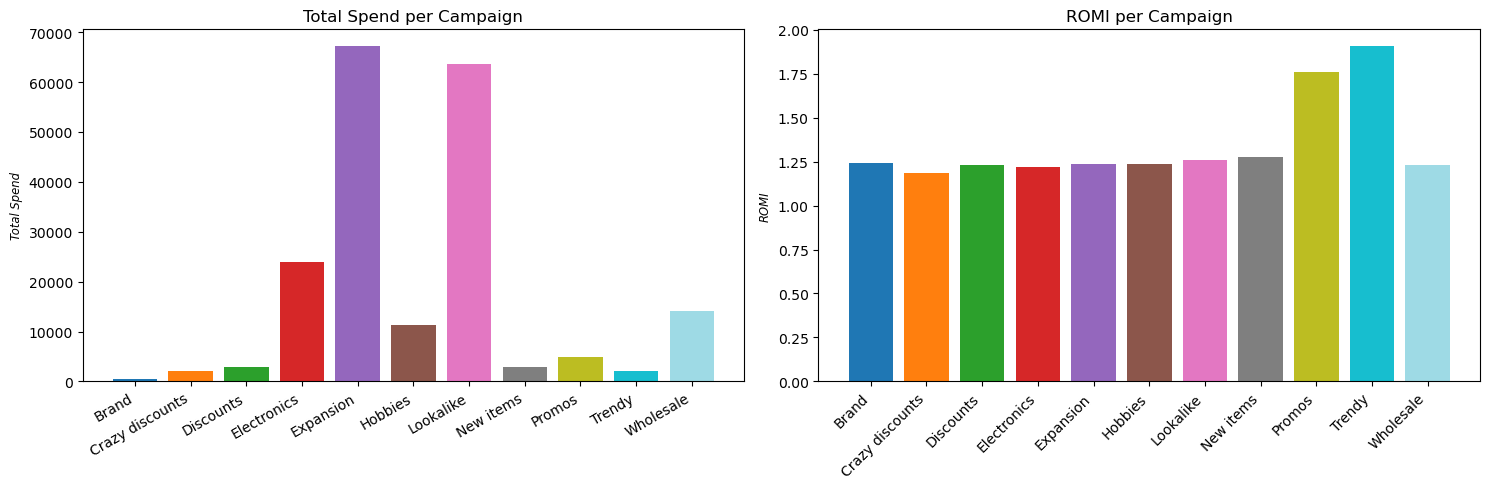

In [7]:


#                                                         dt.year == 2021 removed


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'])
#df_fb = df_fb[df_fb['ad_date'].dt.year == 2021]
grouped_df = df_fb.groupby('campaign_name', as_index=False)[[ 'total_value','total_spend']].sum()
#'total_impressions', 'total_clicks',
grouped_df['romi'] = grouped_df['total_value'] / grouped_df['total_spend']
# figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.autofmt_xdate()
# colormap
#cmap = mpl.cm.get_cmap('tab20', len(grouped_df['campaign_name'].unique()))
#mpl.cm.get_cmap
cmap = plt.cm.get_cmap('tab20', len(grouped_df['campaign_name'].unique()))

# (ax1) 
ax1.bar(grouped_df['campaign_name'], grouped_df['total_spend'], color=cmap.colors, label='Total Spend')
plt.xticks(rotation=45)
ax1.set_ylabel('Total Spend', fontsize='small', fontstyle='italic')
ax1.set_title('Total Spend per Campaign', loc='center')
# (ax2) 
ax2.bar(grouped_df['campaign_name'], grouped_df['romi'], color=cmap.colors, label='ROMI')
ax2.set_ylabel('ROMI', fontsize='small', fontstyle='italic')
ax2.set_title('ROMI per Campaign', loc='center')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

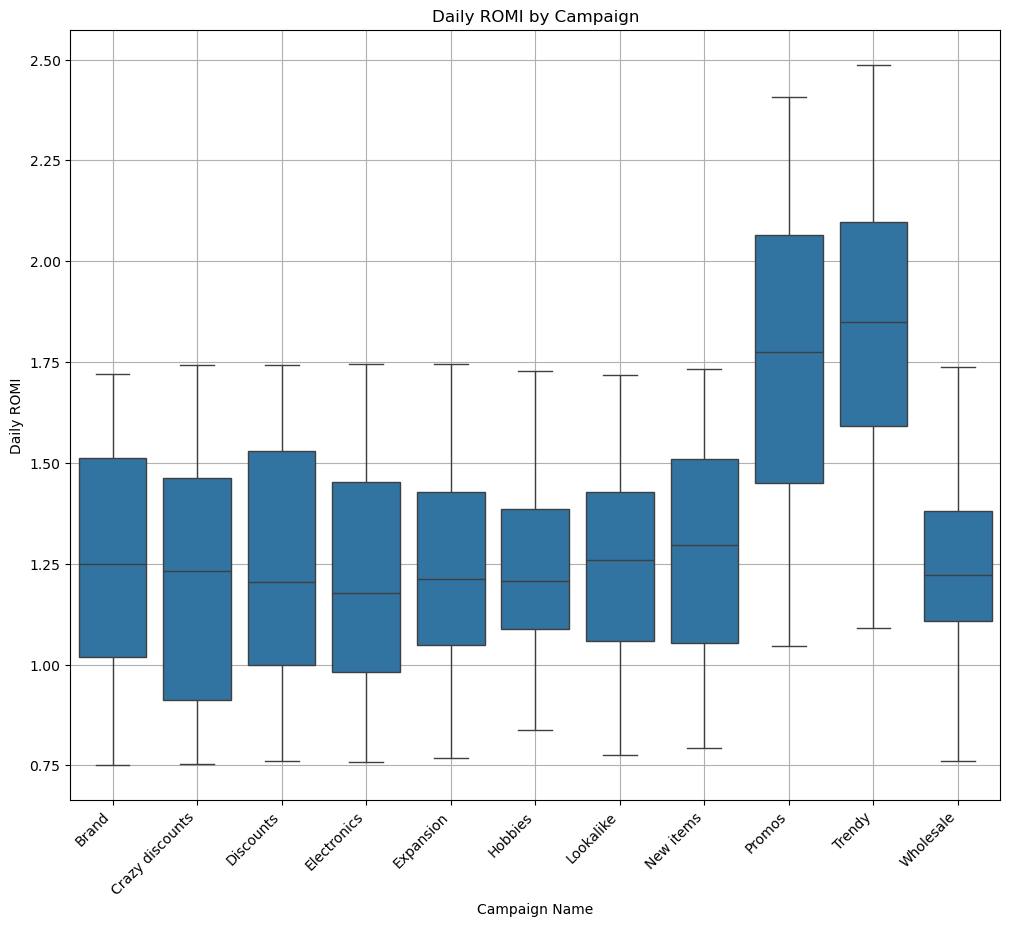

In [13]:
import seaborn as sns            # not sure if i have to remove a year limitation here too
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by 'ad_date' and 'campaign_name'
df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'])
#df_fb = df_fb[df_fb['ad_date'].dt.year == 2021]
daily_romi = df_fb.groupby(['campaign_name', 'ad_date'])[['total_spend', 'total_value']].sum()

daily_romi['romi'] = daily_romi['total_value'] / daily_romi['total_spend']
#daily_romi['romi'] = daily_romi['total_value'] / daily_romi['total_spend']
# Скидаємо multi-index для роботи з seaborn
daily_romi = daily_romi.reset_index()

plt.figure(figsize=(12, 10))
sns.boxplot(x='campaign_name', y='romi', data=daily_romi)

# Оформлення
plt.xticks(rotation=45, ha='right')
plt.xlabel('Campaign Name')
plt.ylabel('Daily ROMI')
plt.title('Daily ROMI by Campaign')
plt.grid(True)

plt.show()

4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

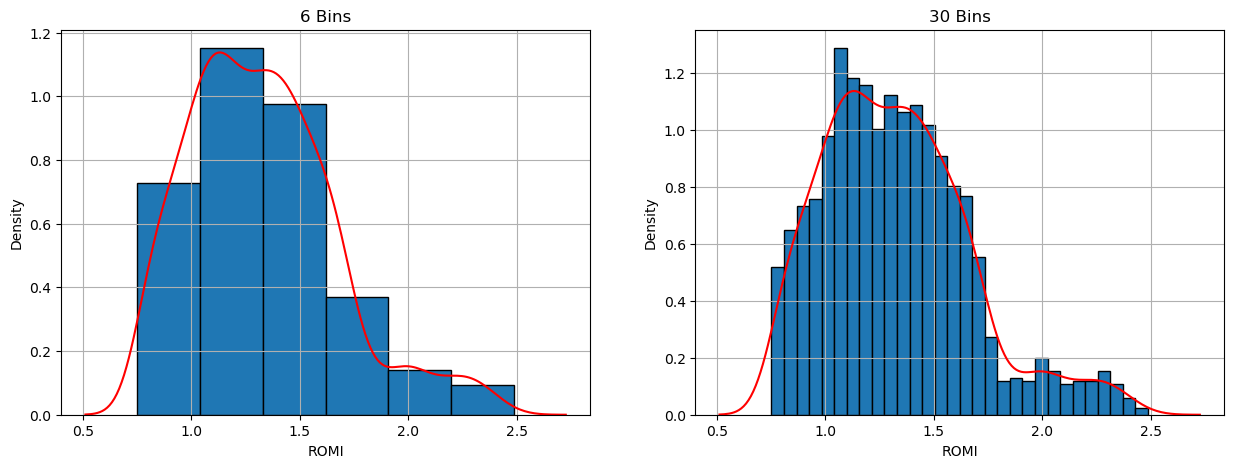

In [18]:
#                            couldnt understand what was wrong, just added trendline and put more bins
#                            for that had to switch to seaborn)))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE


df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")

df_fb['romi'] = df_fb['total_value'] / df_fb['total_spend']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df_fb['romi'].hist(bins=6, edgecolor='black', ax=ax1, density=True) 
sns.kdeplot(df_fb['romi'], ax=ax1, color='red', label="Trendline")  #Kernel Density Estimate 
ax1.set_title('6 Bins')
ax1.set_xlabel('ROMI')

df_fb['romi'].hist(bins=30, edgecolor='black', ax=ax2, density=True)
sns.kdeplot(df_fb['romi'], ax=ax2, color='red', label="Trendline")
ax2.set_title('30 Bins')
ax2.set_xlabel('ROMI')

plt.show()

5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

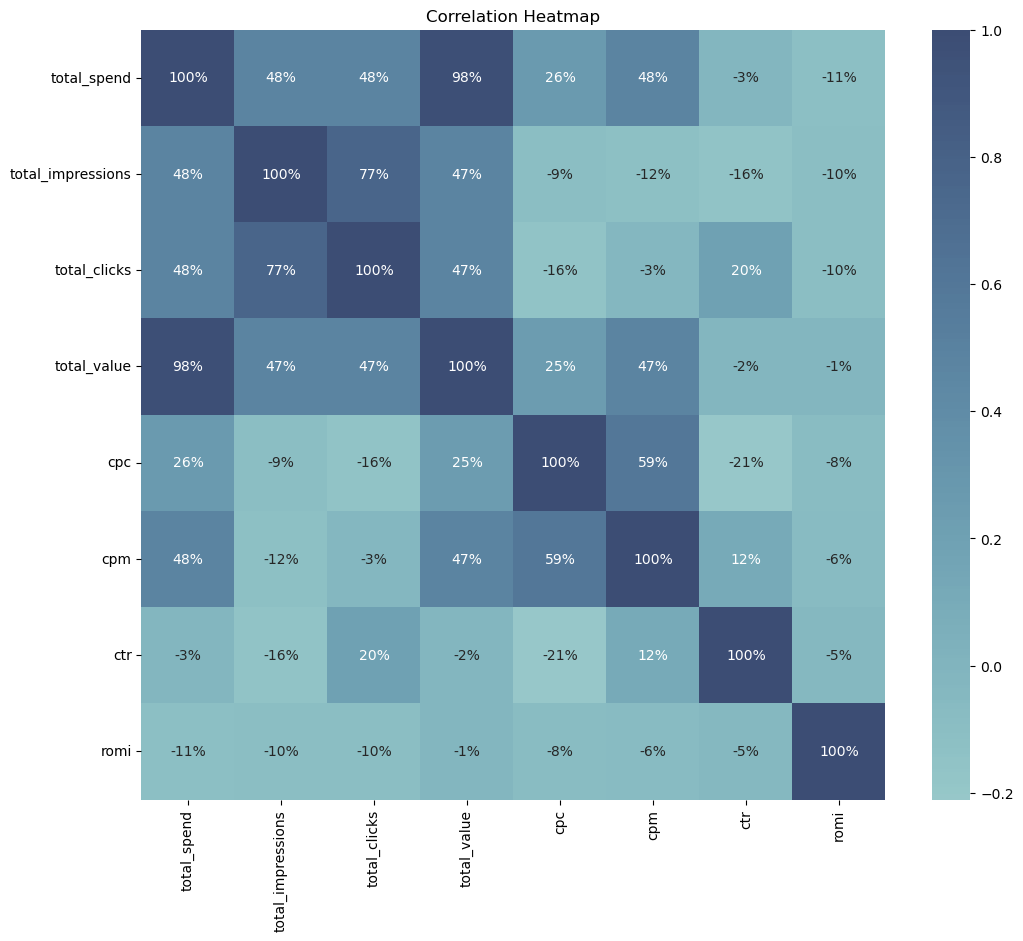

highest correlation to 'total_value': total_spend
lowest correlation to 'total_value': romi


In [12]:



#                             same as in <campaign> chart just removed a year limitation



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'])
#df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'])
#df_fb = df_fb[df_fb['ad_date'].dt.year == 2021]
df_fb['romi'] = df_fb['total_value'] / df_fb['total_spend']
# Create a correlation matrix
#numeric_columns = ['total_spend', 'total_impressions', 'total_clicks', 'total_value', 'romi']
#corr_matrix = df_fb[numeric_columns].corr()
#non_numeric_columns = ['ad_date', 'campaign_name', 'adset_name', 'ad_name']
#corr_matrix = df_fb.drop('campaign_name', axis=1).corr()

corr_matrix = df_fb.drop(['campaign_name', 'ad_date'], axis=1).corr()

# heatmap
plt.figure(figsize=(12, 10))
#the annot=True parameter adds the correlation values inside each cell of the heatmap, 
#and cmap='coolwarm' and center=0 set the color scale to highlight positive and negative correlations.
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.diverging_palette(230, 20, as_cmap=True, palette='Purples')
cmap = sns.cubehelix_palette(start=.1, rot=-.3, light=1, dark=.3, as_cmap=True)
sns.heatmap(corr_matrix,  center=0, annot=True,fmt='.0%',cmap= cmap)
#cmap='coolwarm',
plt.title('Correlation Heatmap')
#plt.xlabel('Features')
#plt.ylabel('Features')

plt.show()
high_corr = corr_matrix['total_value'].sort_values(ascending=False).index[1]  
low_corr = corr_matrix['total_value'].sort_values().index[1]  
print("highest correlation to 'total_value':", high_corr)
print("lowest correlation to 'total_value':", low_corr)


6. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

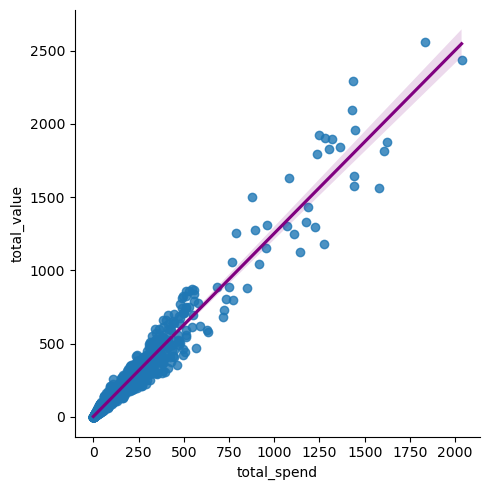

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_fb = pd.read_csv(r"C:\Users\tatia\Downloads\facebook_ads_data (2.0).csv")

# scatter plot with regression line
sns.lmplot(x='total_spend', y='total_value', data=df_fb, fit_reg=True, line_kws={'color': 'purple'})

plt.xlabel('total_spend')
plt.ylabel('total_value')

plt.show()
